### Image restoration 

#### Impainting
* Reconstructing lost part of an image
* Looking at non-damaged regions

In below example we remove the logo from the image

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
# Import the module from restoration
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import inpaint
from skimage import data
from skimage import io

image = io.imread('4.2.06_w_logo_2_2.png')

# Initialize the mask
mask = np.zeros(image.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

#### Noise

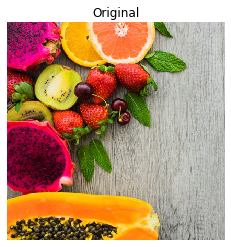

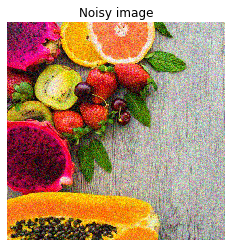

In [13]:
# Add noise:

# Import the module and function
from skimage.util import random_noise

fruit_image = io.imread('fruits_square.jpg')

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

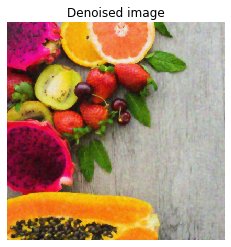

In [14]:
# Remove noise:

# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)

# Show the noisy and denoised images
#show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

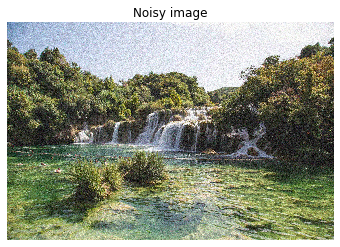

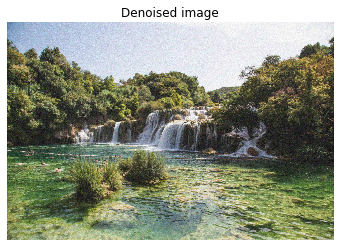

In [15]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

landscape_image = io.imread('noise-noisy-nature.jpg')

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

#### Superpixel segmentation


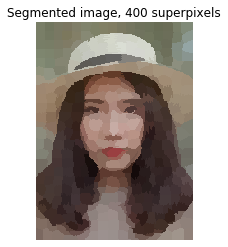

In [6]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb
from skimage import io

face_image = io.imread("chinese.jpg")

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

#### Finding contours

A contours is closed shape of points or line segments, representing the boundaries of the objects.

The input to a contour-finding function is a binary image, which we produce by first applying thresholding. In such a binary image, the object we wish to detect should be white, while background remains black.


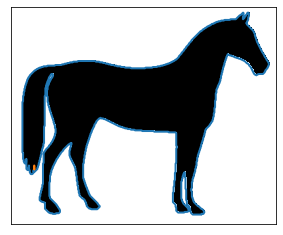

In [26]:
# Import the modules
from skimage import data, measure

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

def show_image_contour(image, contours):
    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)
    
    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    
show_image_contour(horse_image, contours)

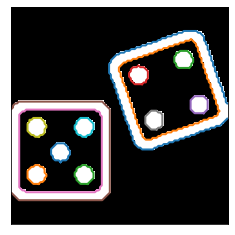

Dice's dots number: 9. 


In [30]:
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# read image
image_dices = io.imread('dices.png')

# Make the image grayscale
image_dices = rgb2gray(image_dices)

# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))